In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Python version: {sys.version}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Pandas version: {pd.__version__}")

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
Pandas version: 2.3.0


In [4]:
train = pd.read_csv("C:/Users/ASUS/Downloads/titanic/train.csv")
test  = pd.read_csv("C:/Users/ASUS/Downloads/titanic/test.csv")
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.info()

train.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [6]:
for col in ["Survived", "Pclass", "Sex", "Embarked"]:
    print(f"\n--- {col} ---")
    print(train[col].value_counts(dropna=False))


--- Survived ---
Survived
0    549
1    342
Name: count, dtype: int64

--- Pclass ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Embarked ---
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


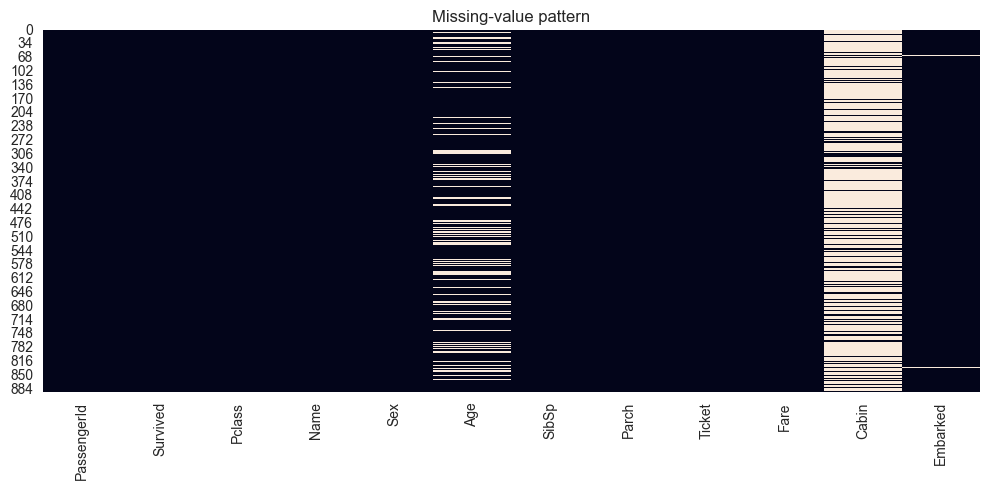

In [45]:
fig = plt.figure(figsize=(10, 5))
sns.heatmap(train.isna(), cbar=False)
plt.title("Missing-value pattern")
plt.tight_layout()
plt.show()

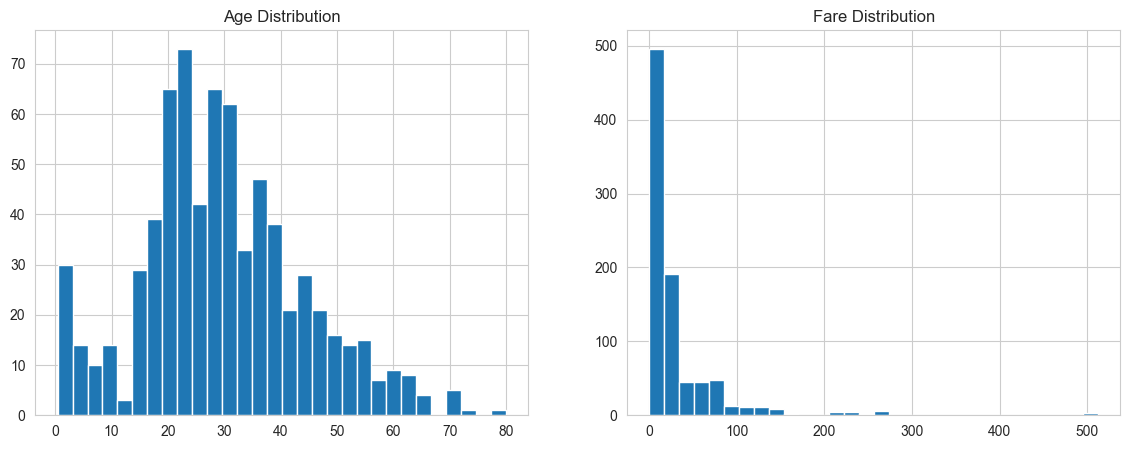

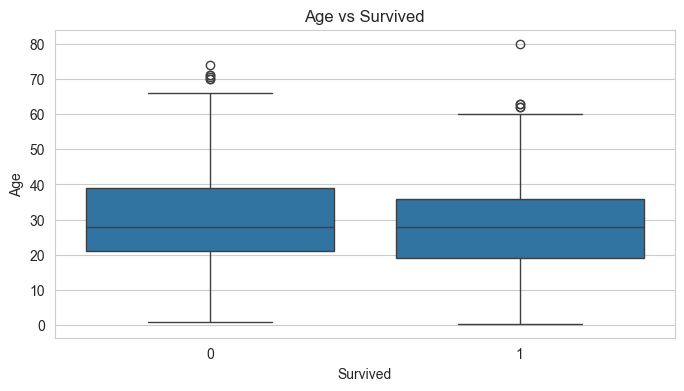

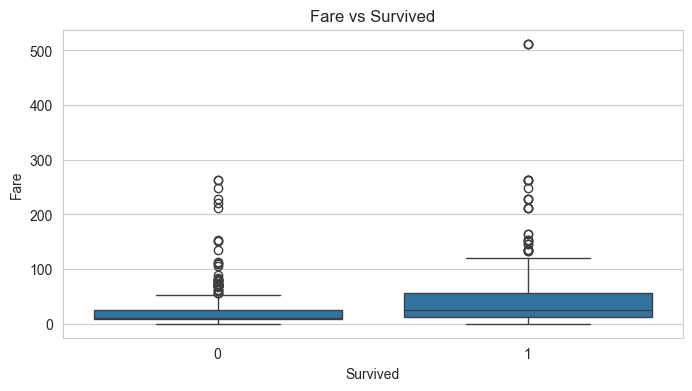

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].hist(train["Age"].dropna(), bins=30)
axes[0].set_title("Age Distribution")
axes[1].hist(train["Fare"], bins=30)
axes[1].set_title("Fare Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="Survived", y="Age", data=train)
plt.title("Age vs Survived")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="Survived", y="Fare", data=train)
plt.title("Fare vs Survived")
plt.show()

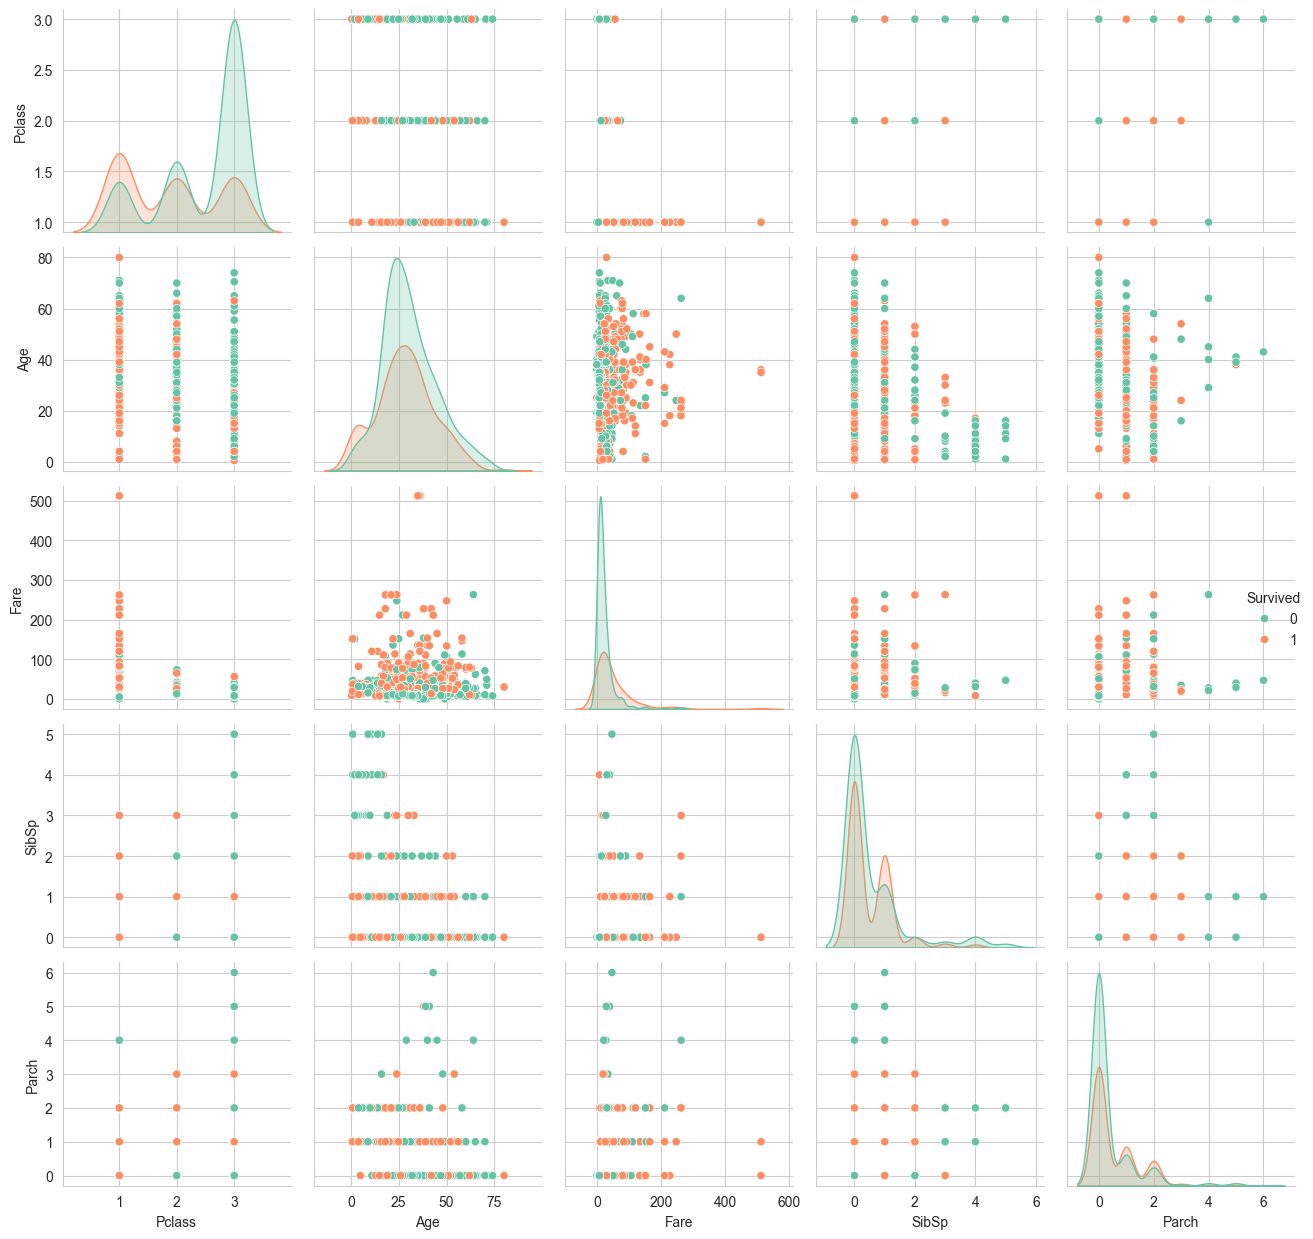

In [14]:
pair_df = train[["Survived", "Pclass", "Sex", "Age", "Fare", "SibSp", "Parch"]].dropna()

pair_df["Sex"] = pair_df["Sex"].map({"male": 0, "female": 1})

g = sns.pairplot(
    data=pair_df,
    hue="Survived",
    palette="Set2",
    vars=["Pclass", "Age", "Fare", "SibSp", "Parch"]
)

plt.tight_layout()
plt.show()

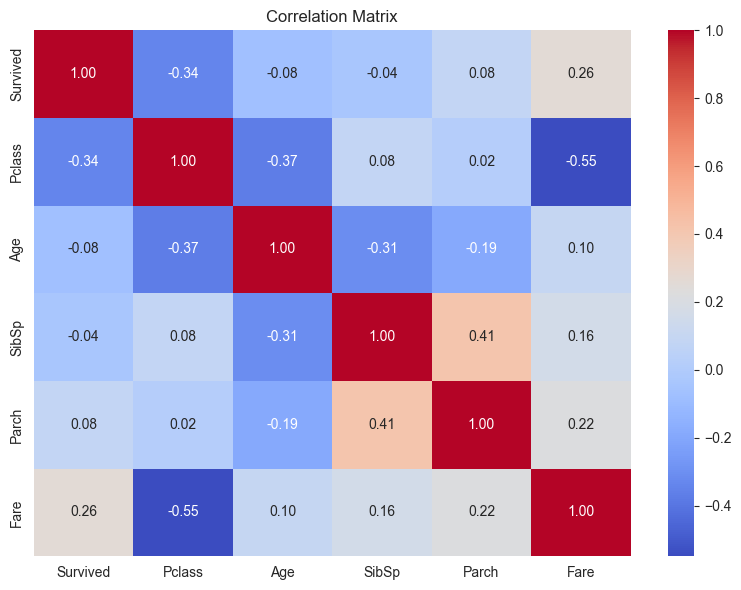

In [15]:
corr = train[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    data=corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [97]:
# Survival rate by sex and class
pd.crosstab(train["Sex"], train["Pclass"],
            values=train["Survived"], aggfunc="mean").style.background_gradient(cmap="RdYlGn")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [99]:
# Survival rate by sex and class
pd.crosstab(train["Sex"], train["Pclass"],
            values=train["Survived"], aggfunc="mean").style.background_gradient(cmap="RdYlGn")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447
